<a href="https://colab.research.google.com/github/vdsrnanditha/Yolo-tomato-detection/blob/main/tomato_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The first step is to import necessary modules.

In [ ]:
import tensorflow as tf
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop

Next, we connect to our google drive to extract and unzip 'tomato.zip'.

This is the zip file that contains our dataset.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install patool        
#this module can be used to unzip folders
#Side note:
#It also allows us to delete non-empty folders on colab, which is othwerwise not possible to do. It's a feature I find handy.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 KB 3.6 MB/s eta 0:00:00


In [ ]:
import patoolib
patoolib.extract_archive('/content/gdrive/MyDrive/tomato.zip')

patool: Extracting /content/gdrive/MyDrive/tomato.zip ...
patool: running /usr/bin/7z x -o./Unpack_puvyeb1u -- /content/gdrive/MyDrive/tomato.zip
patool: ... /content/gdrive/MyDrive/tomato.zip extracted to `tomato'.


'tomato'

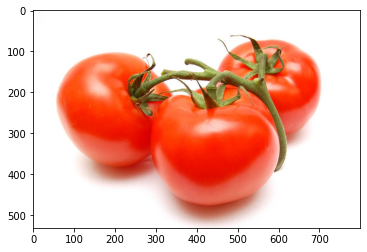

In [ ]:
img = image.load_img("/content/tomato/train/tomato/image_001.jpg")
plt.imshow(img)

#displaying an image just to confirm unzipping was successful

The next part is where we prepare our dataset for training the CNN model

In [ ]:
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

#rescaling

In [ ]:

train_dataset = train.flow_from_directory('/content/tomato/train',
                                         target_size = (40, 40),
                                         batch_size = 3,
                                         class_mode = 'binary')

validation_dataset = train.flow_from_directory('/content/tomato/val',
                                         target_size = (40, 40),
                                         batch_size = 3,
                                         class_mode = 'binary')

#selecting training and validation directories and fixing imahe size, batch size and class mode for the image data

Found 80 images belonging to 2 classes.
Found 27 images belonging to 2 classes.


In [ ]:
print(train_dataset.class_indices, train_dataset.classes, sep = '\n')
print(validation_dataset.class_indices, validation_dataset.classes, sep = '\n')

{'not tomato': 0, 'tomato': 1}
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]
{'not tomato': 0, 'tomato': 1}
[0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


So far, we have set our training and validation directories and checked to verify that 2 classes are present in the train and val directories. It is also noted that 'not tomato' has class 0 and 'tomato' has class 1. This is used later while classifying input image as tomato/ not tomato.

The next step is where we train our model.

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (40, 40, 3)),
                                  tf.keras.layers.MaxPool2D(2, 2), 
                                  #
                                  tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (40, 40, 3)),
                                  tf.keras.layers.MaxPool2D(2, 2),
                                  #
                                  tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (40, 40, 3)),
                                  tf.keras.layers.MaxPool2D(2, 2),
                                  ##
                                  tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(512, activation = 'relu'),
                                   tf.keras.layers.Dense(1, activation = 'sigmoid')
                                  ])

In [ ]:
model.compile(loss = 'binary_crossentropy',
             optimizer = RMSprop(learning_rate = 0.001),
              metrics = ['accuracy'])

#specifying loss function, optimizer and metrics for validation

In [ ]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch = 20,
                     epochs = 80,
                     validation_data = validation_dataset)
#finally, steps per epoch and total number of epochs to be used are specified
#this selection is done based on trial and error
#if the number of epochs is too low or too high there will be less accuracy

Epoch 1/80
20/20 [==============================] - 2s 73ms/step - loss: 0.5144 - accuracy: 0.7458 - val_loss: 0.3158 - val_accuracy: 0.7407
Epoch 2/80
20/20 [==============================] - 1s 59ms/step - loss: 0.2979 - accuracy: 0.8475 - val_loss: 0.1544 - val_accuracy: 0.9630
Epoch 3/80
20/20 [==============================] - 1s 49ms/step - loss: 0.1486 - accuracy: 0.9661 - val_loss: 0.3401 - val_accuracy: 0.8519
Epoch 4/80
20/20 [==============================] - 1s 56ms/step - loss: 0.1452 - accuracy: 0.9661 - val_loss: 0.2903 - val_accuracy: 0.8519
Epoch 5/80
20/20 [==============================] - 1s 52ms/step - loss: 0.1508 - accuracy: 0.9492 - val_loss: 0.0963 - val_accuracy: 0.9630
Epoch 6/80
20/20 [==============================] - 1s 58ms/step - loss: 0.1099 - accuracy: 0.9667 - val_loss: 0.0656 - val_accuracy: 0.9630
Epoch 7/80
20/20 [==============================] - 1s 48ms/step - loss: 0.0382 - accuracy: 1.0000 - val_loss: 0.6339 - val_accuracy: 0.8148
Epoch 8/80
20

The model is ready now. We define a function to classify the image passed to it as tomato/ not tomato using our CNN model.

In [ ]:
def classify(img, pic):
  pic = cv2.cvtColor(pic, cv2.COLOR_BGR2RGB)
  plt.imshow(pic)
  plt.show()
  X = image.img_to_array(img)
  X = np.expand_dims(X, axis=0)
  images = np.vstack([X])
  val = model.predict(images)
  if val == 1:
    print("Tomato")
  else:
    print("NOT tomato")

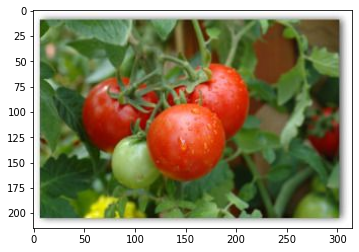

1/1 [==============================] - 0s 69ms/step
Tomato


In [ ]:
img = image.load_img('/content/tomato/image_011.jpg',target_size = (40, 40))
pic = cv2.imread('/content/tomato/image_011.jpg')
classify(img, pic)